In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [18]:
data = pd.read_csv("./data/raw/House_Prices.csv")
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data.to_csv("./data/processed/train.csv", index=False)
test_data.to_csv("./data/processed/test.csv", index=False)


In [22]:
train = pd.read_csv("./data/processed/train.csv")

In [23]:
# Check for missing values
missing_values = train.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

Series([], dtype: int64)


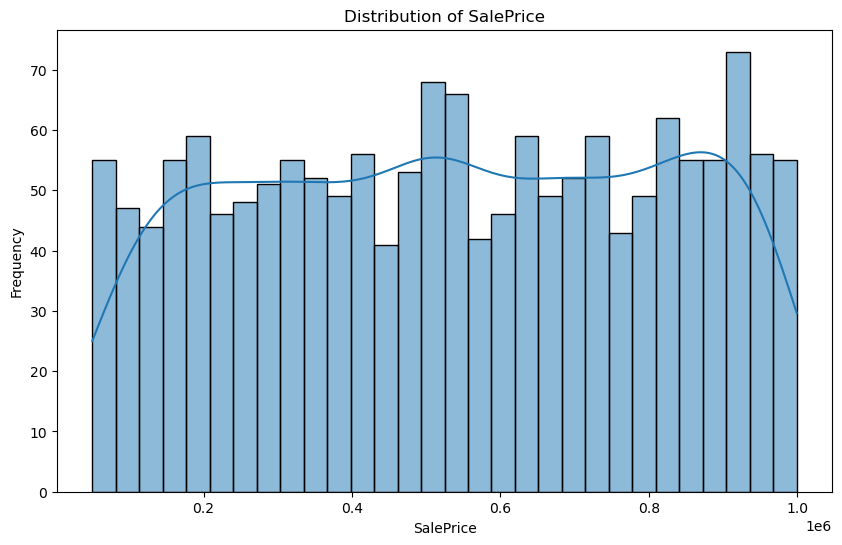

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Price'], kde=True, bins=30)
plt.title("Distribution of Sale_Price")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

In [29]:
# Check column data types
print(train.dtypes)

# Check for missing values
missing_values = train.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Id            int64
Area          int64
Bedrooms      int64
Bathrooms     int64
Floors        int64
YearBuilt     int64
Location     object
Condition    object
Garage       object
Price         int64
dtype: object
Missing values in each column:
Series([], dtype: int64)


In [30]:
# Summary statistics for numerical columns
print(train.describe())

# Unique values in categorical columns
categorical_columns = train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {train[col].nunique()} unique values")

                Id         Area     Bedrooms    Bathrooms       Floors  \
count  1600.000000  1600.000000  1600.000000  1600.000000  1600.000000   
mean    997.376875  2773.721875     3.021250     2.540625     1.997500   
std     574.166552  1301.146750     1.427698     1.109220     0.807249   
min       1.000000   501.000000     1.000000     1.000000     1.000000   
25%     504.750000  1636.000000     2.000000     2.000000     1.000000   
50%     999.500000  2774.000000     3.000000     3.000000     2.000000   
75%    1483.500000  3874.500000     4.000000     4.000000     3.000000   
max    2000.000000  4999.000000     5.000000     4.000000     3.000000   

         YearBuilt          Price  
count  1600.000000    1600.000000  
mean   1962.033750  536183.700000  
std      35.914169  275780.809857  
min    1900.000000   50005.000000  
25%    1930.000000  299127.500000  
50%    1963.000000  533465.500000  
75%    1995.000000  781022.000000  
max    2023.000000  999453.000000  
Location:

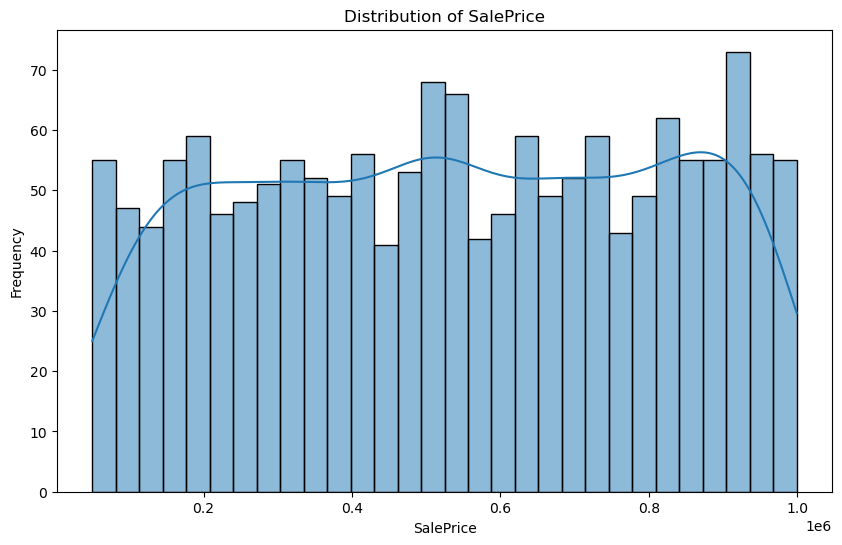

In [36]:
# Identify non-numeric columns
non_numeric_columns = train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to non-numeric columns
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    train[col] = label_encoder.fit_transform(train[col])

Non-numeric columns: Index(['Location', 'Condition', 'Garage'], dtype='object')


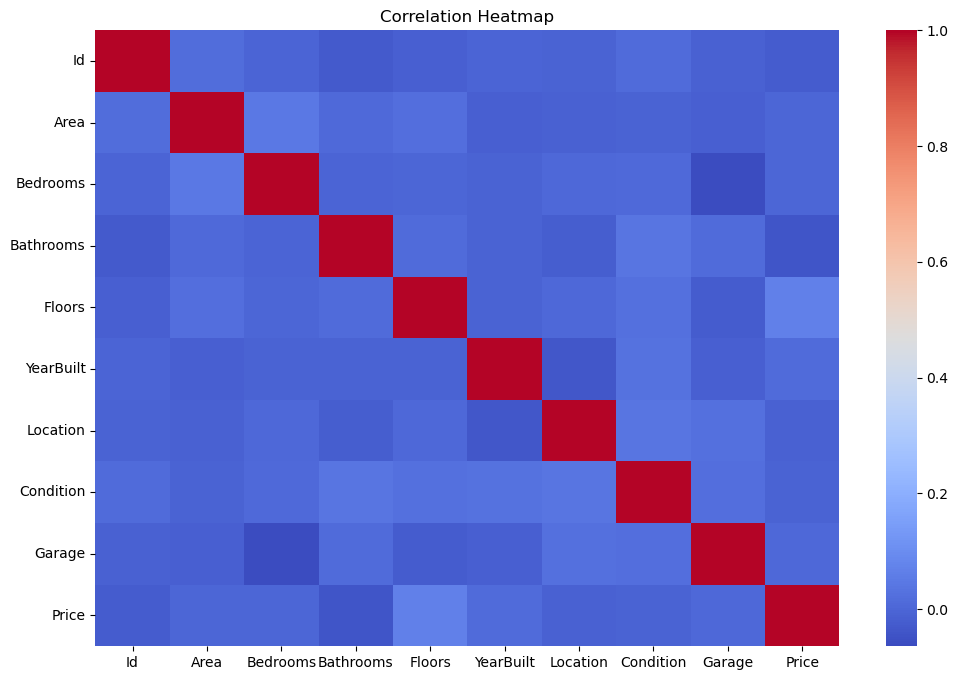

In [38]:

plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [46]:
strong_corr_features = train.corr()['Floors'][train.corr()['Price'].abs() > 0.5]
print("Strongly correlated features with SalePrice:")
print(strong_corr_features)

Strongly correlated features with SalePrice:
Price    0.06808
Name: Floors, dtype: float64
